In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [38]:
from google.colab import drive

In [39]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
%cd /content/drive/'My Drive'/SIGNATE
df=pd.read_table("wine/train.tsv")

/content/drive/My Drive/SIGNATE


In [41]:
df.head()

,id,Y,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,3,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520
1,1,2,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
2,3,1,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885
3,6,1,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105
4,9,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830


In [51]:
df.shape

(89, 15)

In [52]:
df_non_id = df.iloc[:,1:]
df_non_id.head()

,Y,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,3,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520
1,2,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
2,1,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885
3,1,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105
4,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830


In [53]:
label_Y = df_non_id['Y']
df_non_Y = df_non_id.drop('Y', axis=1)

In [54]:
df_non_Y.shape

(89, 13)

In [55]:
df_non_Y.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520
1,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
2,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885
3,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105
4,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830


In [56]:
sc = StandardScaler() #標準化用の関数
x_std = sc.fit_transform(df1) #df1を標準化
X_reduced = TSNE(n_components=2, random_state=0).fit_transform(x_std) #t-SNEにかける。componentsで2次元に圧縮している?

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [57]:
from scipy import stats
scale = sc.fit_transform(X_reduced)
rowsum = (scale**2).sum(1)
p = 1-stats.chi2.cdf(rowsum, df=2)

In [58]:
#このコードは関係ないので無視しても大丈夫
#from statsmodels.stats.multitest import multipletests
#adjp = multipletests(p, 0.01, "fdr_bh")
#adjp

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False]),
 array([0.68711823, 0.82423835, 0.79773883, 0.76647266, 0.68711823,
        0.71027633, 0.71027633, 0.96188104, 0.93627729, 0.7708328 ,
        0.68711823, 0.83009355, 0.68711823, 0.68711823, 0.68711823,
        0.68711823, 0.7708328 , 0.76647266, 0.68711823, 0.84211312,
        0.76647266, 0.7

In [59]:
#sum(adjp[0]==False)

89

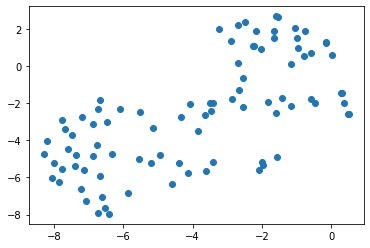

In [60]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],)
plt.show()

In [ ]:
#↑でとりあえす散布図を表示。ここから下のコードでラベル1,2,3ごとに色で表示

In [73]:
label = pd.DataFrame(label_Y)
label.shape

(89, 1)

In [74]:
xx = pd.DataFrame(X_reduced)
xx.head()

,0,1
0,-0.982199,1.494077
1,-3.423807,-5.162715
2,-6.468292,-3.033977
3,-6.330060,-4.762356
4,-6.517238,-7.637643


In [76]:
df_h = pd.concat([xx, label], axis=1)
df_h

,0,1,Y
0,-0.982199,1.494077,3
1,-3.423807,-5.162715,2
2,-6.468292,-3.033977,1
3,-6.330060,-4.762356,1
4,-6.517238,-7.637643,1
...,...,...,...
84,-4.077948,-2.064663,2
85,-1.648218,1.881336,3
86,-7.124997,-5.615244,1
87,-2.691233,2.194113,3


In [78]:
x_1 = []
x_2 = []
x_3 = []
y_1 = []
y_2 = []
y_3 = []

In [88]:
for i in range(len(df_h)):
  if df_h.iloc[i,2] == 1:
    x_1.append(df_h.iloc[i,0])
    y_1.append(df_h.iloc[i,1])
  elif df_h.iloc[i,2] == 2:
    x_2.append(df_h.iloc[i,0])
    y_2.append(df_h.iloc[i,1])
  elif df_h.iloc[i,2] == 3:
    x_3.append(df_h.iloc[i,0])
    y_3.append(df_h.iloc[i,1])

[-6.468292,
 -6.33006,
 -6.517238,
 -5.5090675,
 -6.875756,
 -7.2315173,
 -6.738534,
 -7.197283,
 -7.9997225,
 -7.596639,
 -6.6610885,
 -7.374896,
 -7.066549,
 -6.0932784,
 -7.480088,
 -8.279505,
 -6.872048,
 -7.8532457,
 -7.6823072,
 -8.04265,
 -6.756384,
 -7.383807,
 -6.6109877,
 -8.210176,
 -7.7638702,
 -7.755704,
 -7.124997,
 -6.6745577]

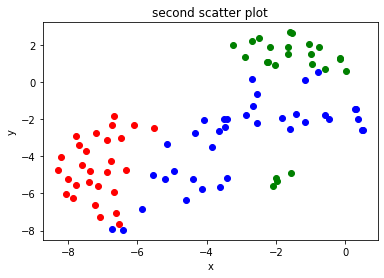

In [91]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.scatter(x_1,y_1, c='red')
ax.scatter(x_2,y_2, c='blue')
ax.scatter(x_3,y_3, c='green')

ax.set_title('second scatter plot')
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.show()